In [91]:
# Connect Twitter API through tweepy
from tweepy import API
from tweepy import OAuthHandler


consumer_key=""
consumer_secret = ""
access_token = "1"
access_secret = ""



auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api =API(auth)

In [92]:
import os
import tweepy as tw
import pandas as pd
#https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/twitter-data-in-python/
# Define the search term and the date_since date as variables

new_search ="UWindsor OR StClairCollege"
date_since = "2021-06-01"
col=['user', "location","text","created_at"]



tweets = tw.Cursor(api.search,
                   q=new_search,
                  # lang="en",-for #Practice Detect Languages
                   lang="en"
                   since=date_since).items(1000)

#all_tweets = [tweet.text for tweet in tweets]
#all_tweets[:5]

users_locs = [[tweet.user.screen_name, tweet.user.location, tweet.text, tweet.created_at] for tweet in tweets]


tweet_text = pd.DataFrame(data=users_locs, 
                    columns=col)
tweet_text.head(20)


,user,location,text,created_at
0,TheEsportsProf,"Ontario, Canada",@Torontofan34 @StClairCollege Congratulations!,2021-06-16 15:04:08
1,UWinFAHSS,Windsor Ontario,RT @LancerClayton: Join more than 600 registra...,2021-06-16 15:00:40
2,UWinFAHSS,Windsor Ontario,RT @ProfCWaters: Delighted that @EboeOsuji wil...,2021-06-16 15:00:25
3,nobukofujita,"Windsor, ON, Canada",@DrRDStanley1 @UWindsor @loriestolarchuk Sound...,2021-06-16 14:57:21
4,LeddyLibrary,"Windsor, Ontario, Canada",Did you know? You can borrow books from other ...,2021-06-16 14:54:44
5,NatashaDaley_,,RT @ProfCWaters: Delighted that @EboeOsuji wil...,2021-06-16 14:52:27
6,ontariocolleges,"Ontario, Canada",@StClairCollege @StClairVisitsU \nHome @stclai...,2021-06-16 14:52:23
7,nobukofujita,"Windsor, ON, Canada",RT @LancerClayton: Join more than 600 registra...,2021-06-16 14:45:31
8,nobukofujita,"Windsor, ON, Canada",@DrRDStanley1 Interested to hear what metrics ...,2021-06-16 14:45:08
9,IkjotSaini_,"Windsor, Ontario",RT @ScienceUWindsor: The pandemic hasn’t slowe...,2021-06-16 14:43:16


In [45]:
print(str(tweet_text['text'].head(3)))

0    RT @elmihiro: Oh dear. Irony just ran out of c...
1    RT @MailSport: Jose Mourinho reveals he cried ...
2    RT @ESPNFC: Christian Eriksen’s agent has said...
Name: text, dtype: object


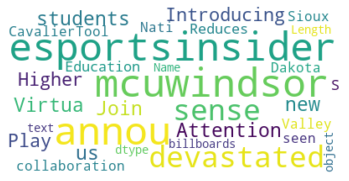

In [64]:
#put in the cloud
#https://www.programcreek.com/python/example/103471/wordcloud.STOPWORDS
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
tm=str(tweet_text['text'])
stop_words = ["https", "co", "RT","@","UWindsor","StClairCollege"] + list(STOPWORDS)
my_c=WordCloud(background_color='white', stopwords=stop_words).generate(tm)
plt.imshow(my_c, interpolation='bilinear')
plt.axis("off")
plt.show()


In [65]:
def check_word_in_tweet(word, data):
    """Checks if a word is in a Twitter dataset's text. 
    Checks text and extended tweet (140+ character tweets) for tweets,
    retweets and quoted tweets.
    Returns a logical pandas Series.
    """
    contains_column = data['text'].str.contains(word, case = False)
   # contains_column |= data['extended_tweet-full_text'].str.contains(word, case = False)
   # contains_column |= data['quoted_status-text'].str.contains(word, case = False)
   # contains_column |= data['quoted_status-extended_tweet-full_text'].str.contains(word,case = False)
   # contains_column |= data['retweeted_status-text'].str.contains(word, case = False)
   # contains_column |= data['retweeted_status-extended_tweet-full_text'].str.contains(word, case = False)
    return contains_column

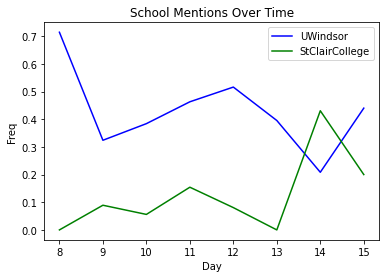

In [71]:
#tweet and time series Vs mentioned Freq
#compare UWindsor and StClairCollege
tweets=tweet_text.set_index('created_at')
tweets['UW']=check_word_in_tweet("UWindsor",tweets)
tweets['St']=check_word_in_tweet("StClairCollege",tweets)
meanUW=tweets['UW'].resample('1 d').mean()
meanSt=tweets['St'].resample('1 d').mean()
plt.plot(meanUW.index.day,meanUW,color="blue")
plt.plot(meanSt.index.day,meanSt,color="green")
plt.xlabel('Day');plt.ylabel('Freq')
plt.title('School Mentions Over Time')
plt.legend(('UWindsor','StClairCollege'))
plt.show()

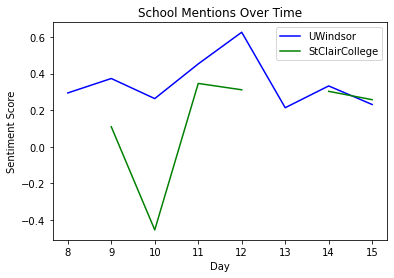

In [86]:
#tweet and time series Vs Sentiment
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid=SentimentIntensityAnalyzer()
sentiment_score=tweets['text'].apply(sid.polarity_scores)
#print(sentiment_score )
sentiment=sentiment_score.apply(lambda x:x['compound'])

sen_UW=sentiment[check_word_in_tweet('UWindsor',tweets)].resample('1 d').mean()
sen_St=sentiment[check_word_in_tweet('StClairCollege',tweets)].resample('1 d').mean()
plt.plot(sen_UW.index.day,sen_UW,color='blue')
plt.plot(sen_St.index.day,sen_St,color='Green')
plt.xlabel('Day');plt.ylabel('Sentiment Score')
plt.title('School Mentions Over Time')
plt.legend(('UWindsor','StClairCollege'))
plt.show()

In [90]:
#Overall Sentiment Scores
from textblob import TextBlob
blob_UW=TextBlob(str(check_word_in_tweet("UWindsor",tweets)))
print('Sentiment of UW: ', blob_UW.sentiment)
blob_St=TextBlob(str(check_word_in_tweet("StClairCollege",tweets)))
print('Sentiment of St Clair College: ', blob_St.sentiment)

Sentiment of UW:  Sentiment(polarity=-0.02500000000000004, subjectivity=0.625)
Sentiment of St Clair College:  Sentiment(polarity=-0.32500000000000007, subjectivity=0.6049999999999999)


In [109]:
#Practice detect languages
#!pip install langdetect
#tweets['UW']=check_word_in_tweet("UWindsor",tweets)
print(tweet_text['text'].head())
tw_l=tweet_text['text']
type(tw_l)
#tweets['St']=check_word_in_tweet("StClairCollege",tweets)
from langdetect import detect_langs
languages = [] 
# Loop over the rows of the dataset and append  
for row in range(len(tw_l)):
    languages.append(detect_langs(tw_l.iloc[row, 1]))

# Clean the list by splitting     
languages = [str(lang).split(':')[0][1:] for lang in languages]

# Assign the list to a new feature 
tweet_text['language'] = languages

print(tweet_text.head())


0       @Torontofan34 @StClairCollege Congratulations!
1    RT @LancerClayton: Join more than 600 registra...
2    RT @ProfCWaters: Delighted that @EboeOsuji wil...
3    @DrRDStanley1 @UWindsor @loriestolarchuk Sound...
4    Did you know? You can borrow books from other ...
Name: text, dtype: object


IndexingError: Too many indexers